In [2]:
from __future__ import print_function

from random import shuffle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import ndimage as ndi

from skimage import feature
from skimage import morphology
from skimage.morphology import watershed
from skimage.feature import peak_local_max, canny
from skimage.filters import roberts, sobel, scharr, prewitt
from skimage.data import camera
from scipy import ndimage as ndi
import cv2

%matplotlib inline

print(cv2.__version__)

3.1.0


orig: <class 'numpy.ndarray'> (333, 500, 3)
gray: <class 'numpy.ndarray'> (333, 500)
(303, 384)


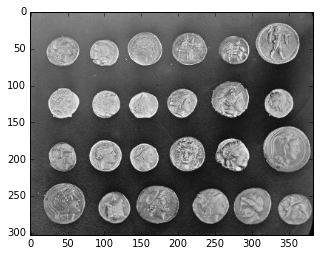

In [3]:
DATA_PRE = "/home/santosh/Downloads/VOCdevkit/VOC2008/"
ifile = DATA_PRE + 'JPEGImages/2008_006452.jpg'

img = cv2.imread(ifile)
print('orig:', type(img), img.shape)

img_gr = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
print('gray:', type(img_gr), img_gr.shape)

 
from skimage import data
coins = data.coins()
print(coins.shape)
plt.imshow(coins, plt.cm.gray)

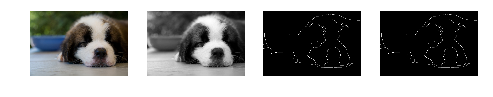

In [3]:
edges_canny = canny(img_gr/255., sigma=3)
fill_img = ndi.binary_fill_holes(edges_canny)

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(8, 3), sharex=True, sharey=True,
                                         subplot_kw={'adjustable': 'box-forced'})

ax0.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), ax0.axis('off')
ax1.imshow(img_gr, cmap=plt.cm.gray), ax1.axis('off')
ax2.imshow(edges_canny, cmap=plt.cm.gray), ax2.axis('off')
ax3.imshow(fill_img, cmap=plt.cm.gray), ax3.axis('off')

label_objects, nb_labels = ndi.label(fill_img)
sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0
coins_cleaned = mask_sizes[label_objects]

(<matplotlib.image.AxesImage at 0x7f131dd0a9e8>, (-0.5, 499.5, 332.5, -0.5))

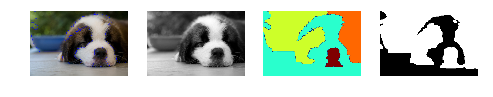

In [4]:
img = cv2.imread(ifile)
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)

# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
ret, sure_fg = cv2.threshold(dist_transform, 0.2*dist_transform.max(),255,0)

# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)

# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0
markers = cv2.watershed(img, markers)
img[markers == -1] = [255,0,0]

fig, (ax0, ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=4, figsize=(8, 3), sharex=True, sharey=True,
                                         subplot_kw={'adjustable': 'box-forced'})
ax0.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), ax0.axis('off')
ax1.imshow(gray, cmap=plt.cm.gray), ax1.axis('off')
ax2.imshow(markers), ax2.axis('off')
ax3.imshow(sure_bg, cmap=plt.cm.gray), ax3.axis('off')

In [22]:
%matplotlib notebook

import numpy as np
import os
import scipy

import skimage
from matplotlib import pyplot as plt
from matplotlib import colors
from skimage import exposure
from skimage.segmentation import quickshift, felzenszwalb
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
print(skimage.__version__)

0.12.3


In [1]:
img = cv2.imread(ifile)

segments_quick = quickshift(img, kernel_size=35, max_dist=35, ratio=0.35, sigma=5.0, convert2lab=False)
n_segments = len(np.unique(segments_quick))

print(n_segments, segments_quick.shape)

segments = felzenszwalb(img, scale=3.0, sigma=5.0, min_size=25)

cmap = colors.ListedColormap(np.random.rand(n_segments, 3))
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True,
                                         subplot_kw={'adjustable': 'box-forced'})
ax0.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), ax0.axis('off')
ax1.imshow(segments_quick, interpolation='none', cmap=cmap), ax1.axis('off')
ax2.imshow(segments, cmap=cmap), ax2.axis('off')

NameError: name 'cv2' is not defined

/home/santosh/Downloads/VOCdevkit/VOC2008/JPEGImages/2008_006452.jpg
(333, 500, 3) (333, 500) 2


<IPython.core.display.Javascript object>


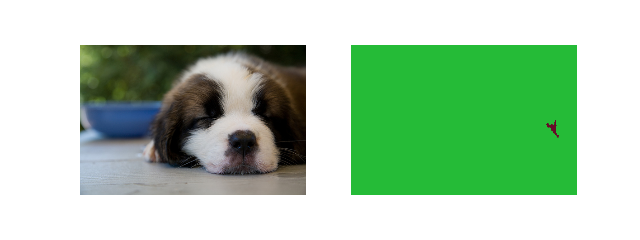

(<matplotlib.image.AxesImage at 0x7f3be8da4ef0>, (-0.5, 499.5, 332.5, -0.5))

In [33]:
img = cv2.imread(ifile)
print(ifile)
segments = felzenszwalb(img, scale=1./500.0, sigma=0.5, min_size=20)
n_segs = len(np.unique(segments))

cmap = colors.ListedColormap(np.random.rand(n_segs, 3))

print(img.shape, segments.shape, n_segs)

fig, (ax0, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharex=True, sharey=True,
                                         subplot_kw={'adjustable': 'box-forced'})

ax0.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), ax0.axis('off')
ax2.imshow(segments, cmap=cmap), ax2.axis('off')

<IPython.core.display.Javascript object>


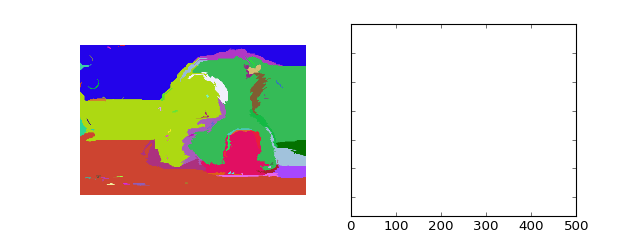

(<matplotlib.image.AxesImage at 0x7f3be90da048>, (-0.5, 499.5, 332.5, -0.5))

In [34]:
pfile = '/home/santosh/work/image_seg_crf/src/segment/out.ppm'
img = cv2.imread(pfile)

n_patches = len(np.unique(img))

print('npatche')
fig, (ax0, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 3), sharex=True, sharey=True,
                                         subplot_kw={'adjustable': 'box-forced'})
ax0.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), ax0.axis('off')
